# KNN $($ K$-$Nearest Neighbours $)$

## Classification $-$ survivors of the titanic

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns

# dataset
titanic = sns.load_dataset("titanic")
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [3]:
# prepare the data
titanic = titanic[['survived', 'pclass', 'sex', 'age']]

# eliminate missing data (NaN)
titanic.dropna(axis=0, inplace=True)

# replace the `male` by 0 and `female` by 1
titanic['sex'].replace(['male', 'female'], [0, 1], inplace=True)
titanic.head()

,survived,pclass,sex,age
0,0,3,0,22.0
1,1,1,1,38.0
2,1,3,1,26.0
3,1,1,1,35.0
4,0,3,0,35.0


## The `sklearn.neighbors` module

In [4]:
from sklearn.neighbors import KNeighborsClassifier

In [5]:
# Create a classification model
model = KNeighborsClassifier()

In [6]:
# Target
y = titanic['survived']

# Features
X = titanic.drop('survived', axis=1)

In [7]:
# Training the model on the data
model.fit(X, y)

# Evaluate the model 
model.score(X, y) # Coefficient of determination

0.8319327731092437

In [8]:
# We will create a function that will predict if a 
# Titanic passenger will survive or not

def survived(model, pclass=3, sex=0, age=26):
    """ predict if a Titanic passenger will survive or not.
    """
    x = np.array([pclass, sex, age]).reshape(1, 3)
    return model.predict(x), model.predict_proba(x)

In [9]:
is_survived, proba = survived(model)

# Calcul the predicted labels y
print("Is survived: ", is_survived)

# The probability of each class
print("The probability of each class: ", proba)

Is survived:  [0]
The probability of each class:  [[0.6 0.4]]


## Comparing score (Coefficient of determination) with the K Value

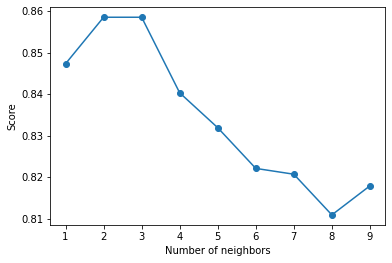

In [14]:
import matplotlib.pyplot as plt

scores = []
list_n_neighbors = list(range(1, 10))

for k in list_n_neighbors:
    # Create a classification model
    model = KNeighborsClassifier(n_neighbors=k)
    
    # Training the model on the data
    model.fit(X, y)

    # Evaluate the model 
    score = model.score(X, y) # Coefficient of determination
    scores.append(score)

# plot the result of the comparison
plt.xlabel('Number of neighbors')
plt.ylabel('Score')
_ = plt.plot(list_n_neighbors, scores, marker='o')

In [15]:
# Create a classification model
model = KNeighborsClassifier(n_neighbors=2)

# Training the model on the data
model.fit(X, y)

# # Calcul the predicted and the probability of each class
is_survived, proba = survived(model)

# The predicted labels y
print("Is survived: ", is_survived)

# The probability of each class
print("The probability of each class: ", proba)

Is survived:  [0]
The probability of each class:  [[0.5 0.5]]
